In [1]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())
import os
import sqlalchemy

conn = sqlalchemy.create_engine(os.getenv("SUPABASE_CONN_STRING")).connect()

In [3]:
import pandas as pd
from sqlalchemy import sql

data = pd.read_sql(sql.text("SELECT * FROM poker.two_player_game_odds"), conn)

In [4]:
data.columns

Index(['card_1', 'card_2', 'count', 'wins', 'win_rate', 'rank', 'percentile',
       'sklansky', 'sklansky_position', 'modified_sklansky',
       'modified_sklansky_position'],
      dtype='object')

In [5]:
data['diff'] = data.apply(lambda x: x['sklansky'] - x['modified_sklansky'], axis=1)

<AxesSubplot:>

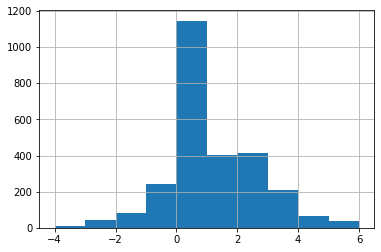

In [6]:
data['diff'].hist()

In [7]:
data['diff'].mean()

0.6523378582202112

In [8]:
import math
data[abs(data['diff']) >1]

,card_1,card_2,count,wins,win_rate,rank,percentile,sklansky,sklansky_position,modified_sklansky,modified_sklansky_position,diff
54,9 of Clubs,9 of Diamonds,761,575.0,0.755585,55,97.926094,3,"Early, Middle, Late",1,"Early, Middle, Late",2
55,9 of Hearts,9 of Diamonds,708,532.5,0.752119,56,97.888386,3,"Early, Middle, Late",1,"Early, Middle, Late",2
60,9 of Clubs,9 of Spades,807,599.0,0.742255,61,97.699849,3,"Early, Middle, Late",1,"Early, Middle, Late",2
63,8 of Hearts,8 of Diamonds,785,577.0,0.735032,64,97.586727,4,"Early, Middle, Late",2,"Early, Middle, Late",2
70,8 of Clubs,8 of Diamonds,761,549.0,0.721419,71,97.322775,4,"Early, Middle, Late",2,"Early, Middle, Late",2
...,...,...,...,...,...,...,...,...,...,...,...,...
2371,3 of Diamonds,4 of Diamonds,772,285.0,0.369171,2372,10.558069,7,Late if no bettors,9,Not playable,-2
2374,4 of Spades,3 of Spades,781,288.0,0.368758,2375,10.444947,7,Late if no bettors,9,Not playable,-2
2380,3 of Clubs,4 of Clubs,772,284.0,0.367876,2381,10.218703,7,Late if no bettors,9,Not playable,-2
2474,3 of Hearts,4 of Hearts,796,281.5,0.353643,2475,6.674208,7,Late if no bettors,9,Not playable,-2
